# Analysis of Goodreads Data Set


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import matplotlib.colors as mcolors

After importing our packages, let's first load our data set. The data set is from Kaggle (https://www.kaggle.com/datasets/jealousleopard/goodreadsbooks)

In [2]:
book_data = pd.read_csv('books_data.csv', on_bad_lines = 'skip')
book_data.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


## Exploration

In [3]:
book_data.columns.values

array(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count',
       'text_reviews_count', 'publication_date', 'publisher'],
      dtype=object)

In [4]:
book_data.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000



First, there is an issue with our num_pages category - it has an added space before the phrase "num_pages"! To make things easier to work with, we will rename the column without the space. 

In [5]:
book_data['num_pages'] = book_data['  num_pages']
book_data = book_data.drop(['  num_pages'], axis=1)
book_data.shape

(11123, 12)

Remove books that less than 10 pages, as these may not be actual books. We can see how many rows were removed using the shape command.

In [6]:
book_data = book_data[book_data['num_pages'] > 10]

book_data.shape

(10915, 12)

In [7]:
book_data.describe()

,bookID,average_rating,isbn13,ratings_count,text_reviews_count,num_pages
count,10915.000000,10915.000000,1.091500e+04,1.091500e+04,10915.000000,10915.000000
mean,21310.824553,3.933944,9.759478e+12,1.827388e+04,551.766193,342.752726
std,13105.648839,0.347866,4.471674e+11,1.135400e+05,2600.058298,238.973072
min,1.000000,0.000000,8.987060e+09,0.000000e+00,0.000000,11.000000
25%,10262.000000,3.770000,9.780345e+12,1.130000e+02,9.000000,200.000000
50%,20250.000000,3.960000,9.780571e+12,7.880000e+02,48.000000,304.000000
75%,32110.500000,4.130000,9.780872e+12,5.159000e+03,245.000000,416.000000
max,45641.000000,5.000000,9.790008e+12,4.597666e+06,94265.000000,6576.000000


Now that we have no books with < 10 pages, let's look at the distributions of all of our numerical data using histograms.

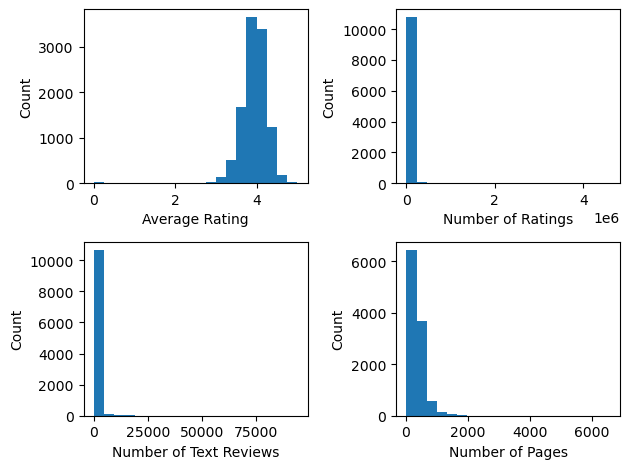

In [8]:
fig,ax = plt.subplots(2,2)
ax[0,0].hist(book_data['average_rating'], bins=20)
ax[0,0].set_xlabel('Average Rating')
ax[0,0].set_ylabel('Count')
ax[0,1].hist(book_data['ratings_count'], bins =20)
ax[0,1].set_xlabel('Number of Ratings')
ax[0,1].set_ylabel('Count')
ax[1,0].hist(book_data['text_reviews_count'],bins=20)
ax[1,0].set_xlabel('Number of Text Reviews')
ax[1,0].set_ylabel('Count')
ax[1,1].hist(book_data['num_pages'], bins=20)
ax[1,1].set_xlabel('Number of Pages')
ax[1,1].set_ylabel('Count')
plt.tight_layout()
plt.show()

It looks like the average rating is pretty normally distributed around the mean (3.9), while the number of ratings, text reviews, and pages are left-skewed. 

## Top Sellers 

First, we can see which books have the highest ratings. We will ensure that the entry has at least 10,000 ratings to ensure that highly rated books with only a few ratings are not considered.

Text(0.5, 1.0, 'Top 20 Average Ratings for Books with Over 10,000 Ratings')

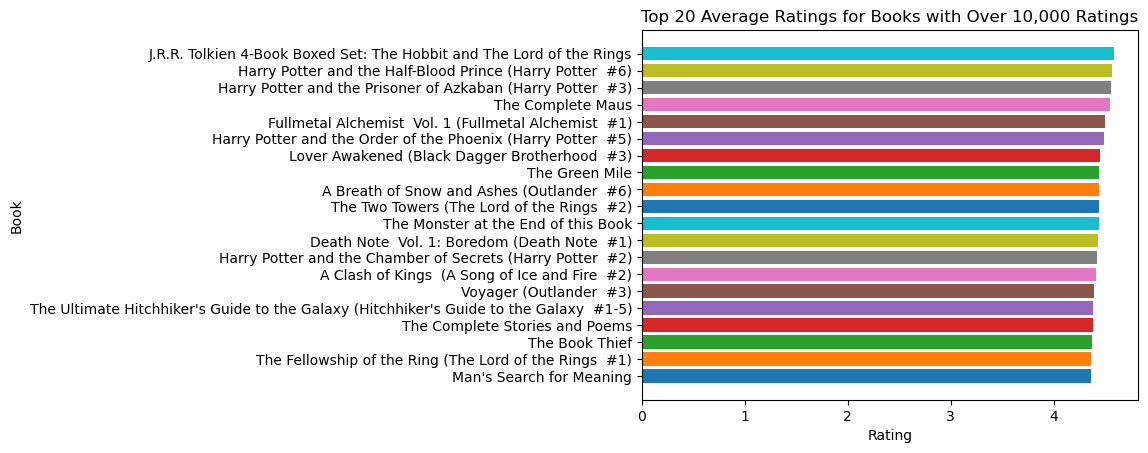

In [9]:
top_sellers_df = book_data[book_data['ratings_count'] > 100000]
top20_rating = top_sellers_df.nlargest(20, 'average_rating').sort_values(by='average_rating')

plt.barh(top20_rating['title'],top20_rating['average_rating'], color = mcolors.TABLEAU_COLORS)
plt.xlabel('Rating')
plt.ylabel('Book')
plt.title('Top 20 Average Ratings for Books with Over 10,000 Ratings')

Next, let's see which books have the highest total number of ratings.

Text(0.5, 1.0, 'Top 20 Number of Ratings for Books with Over 10,000 Ratings')

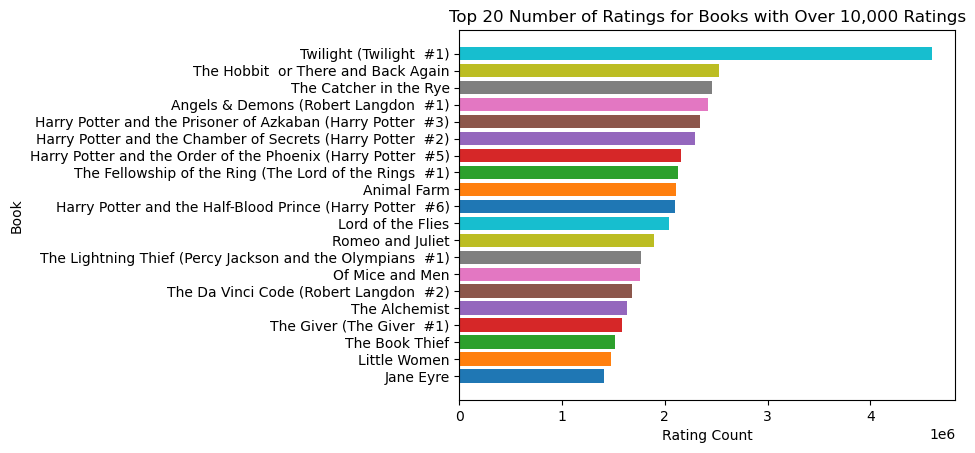

In [10]:
top_sellers_df = book_data[book_data['ratings_count'] > 100000]
top20_ratingcount = top_sellers_df.nlargest(20, 'ratings_count').sort_values(by='ratings_count')

plt.barh(top20_ratingcount['title'],top20_ratingcount['ratings_count'], color = mcolors.TABLEAU_COLORS)
plt.xlabel('Rating Count')
plt.ylabel('Book')
plt.title('Top 20 Number of Ratings for Books with Over 10,000 Ratings')

Next, let's see how these books stack up when using a weighted rating value that is equal to the total ratings count multipled by the average rating.

Text(0.5, 1.0, 'Top 20 Weighted Ratings for Books with Over 10,000 Ratings')

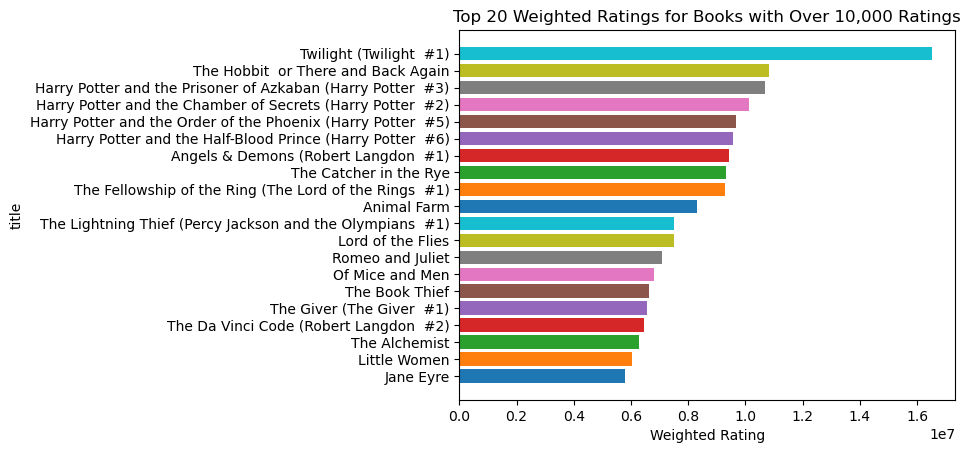

In [11]:
book_data['weighted_rating'] = book_data.average_rating*book_data.ratings_count
top20 = (book_data.nlargest(20, 'weighted_rating')).sort_values(by='weighted_rating') 
plt.barh(top20['title'],top20['weighted_rating'], color = mcolors.TABLEAU_COLORS)
plt.xlabel('Weighted Rating')
plt.ylabel('title')
plt.title('Top 20 Weighted Ratings for Books with Over 10,000 Ratings')



In [12]:


x = list(set(top20_rating['title'].values) - set(top20_ratingcount['title'].values))

y = list(set(top20_ratingcount['title'].values) - set(top20_rating['title'].values))

d = {'Top Voted, Not Top Rated': y, 'Top Rated, Not Top Voted':x}
df= pd.DataFrame(d)
df

,"Top Voted, Not Top Rated","Top Rated, Not Top Voted"
0,Lord of the Flies,Man's Search for Meaning
1,The Lightning Thief (Percy Jackson and the Oly...,The Two Towers (The Lord of the Rings #2)
2,Twilight (Twilight #1),Lover Awakened (Black Dagger Brotherhood #3)
3,The Da Vinci Code (Robert Langdon #2),The Complete Maus
4,Animal Farm,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...
5,The Catcher in the Rye,The Ultimate Hitchhiker's Guide to the Galaxy ...
6,Angels & Demons (Robert Langdon #1),Death Note Vol. 1: Boredom (Death Note #1)
7,Romeo and Juliet,Voyager (Outlander #3)
8,The Alchemist,The Complete Stories and Poems
9,Of Mice and Men,The Green Mile


Taking into account the total number of ratings, and not just the average rating, changes our top books. Twilight does not appear at all when considering the top average rated book, but when configuring in the total number of ratings, it far exceeds the other books. The table above also shows that there are numerous books that are top rated but not top voted, and vice versa. The weighted rating, which takes into account both number of ratings and rating average, is may be a useful metric.

## Top Authors

Now, let's look at top selling authors. First, we'll see who has the most amount of books in this set of data

Text(0.5, 1.0, 'Authors with Greatest Number of Books with an Average Rating Above 4.3')

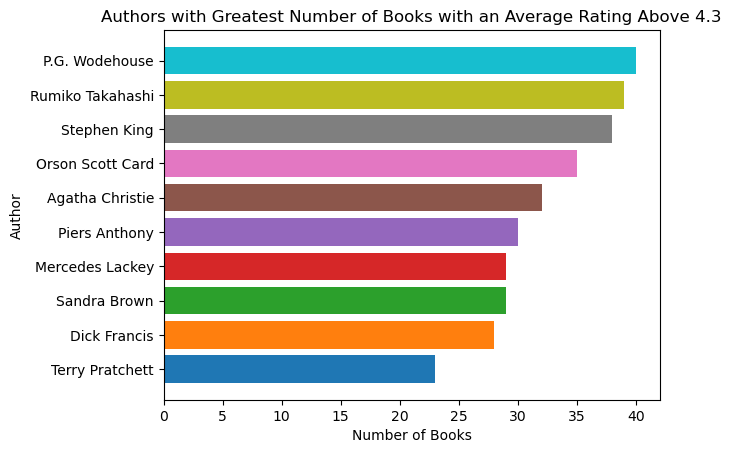

In [13]:

topauthors = book_data[book_data['average_rating']>=4.3]

topauthors = book_data[['authors','title']].groupby('authors').count().sort_values(by = 'title',ascending=False).head(10)
topauthors = topauthors.sort_values(by = 'title')
plt.barh( topauthors.index, topauthors['title'],color = mcolors.TABLEAU_COLORS)
plt.xlabel('Number of Books')
plt.ylabel('Author')
plt.title('Authors with Greatest Number of Books with an Average Rating Above 4.3')

We will now try to find the "best" author. To do so, we will first select authors with the highest total amount of ratings.

In [14]:
#sort authors by rating count to chooose only authors with highest amount of ratings
total_author_rating = book_data.copy()


total_author_rating['RatingSum'] = total_author_rating.groupby('authors')['ratings_count'].transform(np.sum)
total_author_rating['RatingSum'].describe(percentiles = [0.95, 0.97, 0.99])


count    1.091500e+04
mean     1.283943e+05
std      4.662667e+05
min      0.000000e+00
50%      3.791000e+03
95%      7.195904e+05
97%      1.129456e+06
99%      2.091579e+06
max      8.923980e+06
Name: RatingSum, dtype: float64

We will use the 99th percentile of authors by rating count and now determine which author in that subset had the highest average rating.

Text(0.5, 1.0, 'Top Rated Authors')

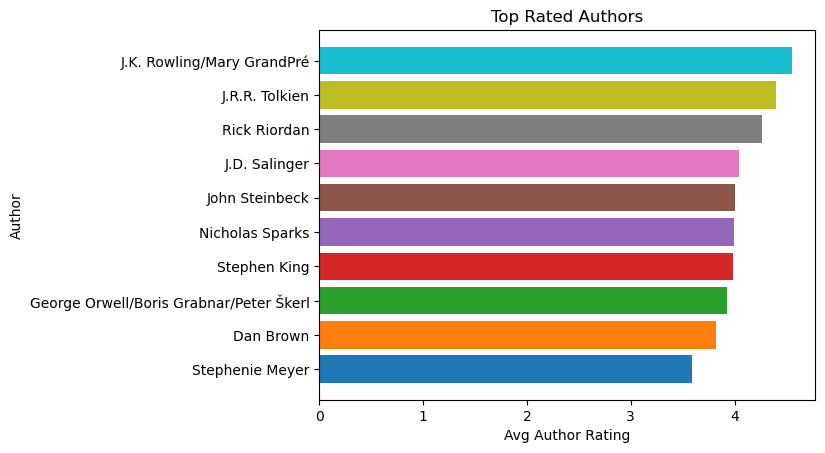

In [15]:
avg_author_rating = total_author_rating[total_author_rating['RatingSum']>2.09e06]
avg_author_rating = avg_author_rating.groupby(by=['authors']).agg({'average_rating': ['mean']})
avg_author_rating.columns = ['avg_author_rating']
avg_author_rating = avg_author_rating.sort_values(by = 'avg_author_rating',ascending = False).head(10)
avg_author_rating = avg_author_rating.sort_values(by = 'avg_author_rating')


plt.barh(avg_author_rating.index, avg_author_rating['avg_author_rating'],color = mcolors.TABLEAU_COLORS)
plt.xlabel('Avg Author Rating')
plt.ylabel('Author')
plt.title('Top Rated Authors')

It looks like JK Rowling is our top rated author, which is not a surprise!

## Top Publishers

Now, we will see which publishers are most common in this dataset.

Text(0.5, 1.0, 'Top Publishers')

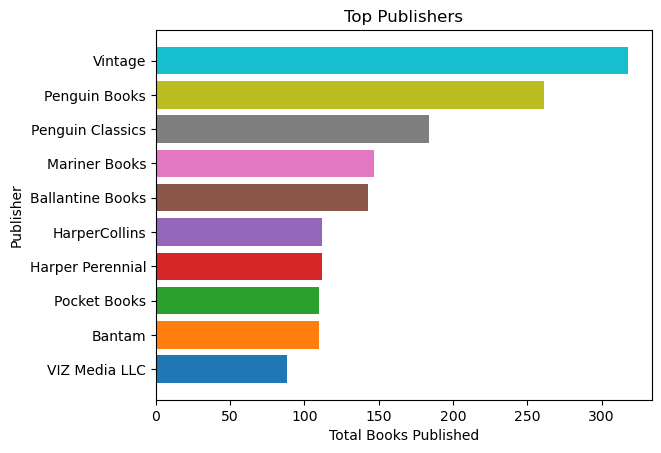

In [16]:


pubcount = book_data['publisher'].value_counts().rename_axis('Publisher').reset_index(name='counts')

pubcount = pubcount.sort_values(by = 'counts',ascending=False).head(10)
pubcount = pubcount.sort_values(by = 'counts')
#pubcount.describe()

plt.barh(pubcount['Publisher'], pubcount['counts'],color = mcolors.TABLEAU_COLORS)
plt.xlabel('Total Books Published')
plt.ylabel('Publisher')
plt.title('Top Publishers')



Looks like "Vintage" is the most common publisher. Vintage refers to any older publisher, and since many books were written awhile ago, it makes sense that this category published the highest number of books in this dataset.

## Number of Text Reviews vs Average Rating

Let's see if there is a correlation between the average rating and the number of text reviews for a book

In [17]:
book_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10915 entries, 0 to 11122
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              10915 non-null  int64  
 1   title               10915 non-null  object 
 2   authors             10915 non-null  object 
 3   average_rating      10915 non-null  float64
 4   isbn                10915 non-null  object 
 5   isbn13              10915 non-null  int64  
 6   language_code       10915 non-null  object 
 7   ratings_count       10915 non-null  int64  
 8   text_reviews_count  10915 non-null  int64  
 9   publication_date    10915 non-null  object 
 10  publisher           10915 non-null  object 
 11  num_pages           10915 non-null  int64  
 12  weighted_rating     10915 non-null  float64
dtypes: float64(2), int64(5), object(6)
memory usage: 1.2+ MB


Text(0, 0.5, 'Average Rating')

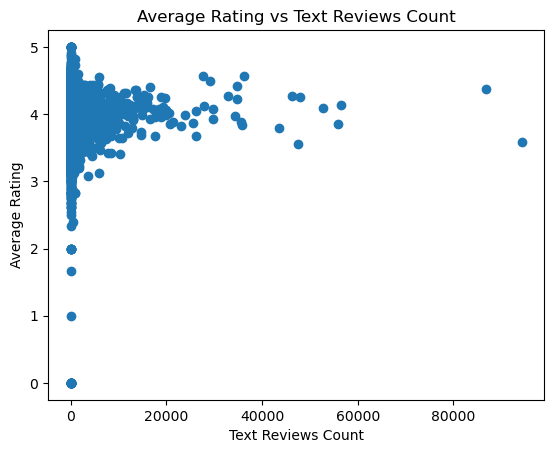

In [18]:
plt.scatter(x = book_data['text_reviews_count'], y =book_data['average_rating'])
plt.title('Average Rating vs Text Reviews Count')
plt.xlabel('Text Reviews Count')
plt.ylabel('Average Rating')

We will first check the normal distribution assumptions of our dataset. To better visualize the distribution of the number of text reviews, I decided to exclude outliers. I tested out two methods: removal by interquantile range and removal by z score. The interquantile range method excluded a significant number of data points compare to the z score. To ensure I still had sufficient data points, I chose to the z score to remove the outliers 


In [19]:
z = np.abs(stats.zscore(book_data['text_reviews_count']))

text_reviews_clean = book_data['text_reviews_count'][(z<3)]
print(text_reviews_clean)
#remove outliers by zscore


2        244
4        164
5          1
6        808
7        254
        ... 
11118     20
11119     56
11120     95
11121    139
11122     12
Name: text_reviews_count, Length: 10792, dtype: int64


In [20]:
#remove outliers by quantile

#Q1 = book_data['text_reviews_count'].quantile(q=.25)
#Q3 = book_data['text_reviews_count'].quantile(q=.75)
#IQR = book_data['text_reviews_count'].apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
#text_reviews_clean = book_data['text_reviews_count'][~((book_data['text_reviews_count'] < (Q1-1.5*IQR)) | (book_data['text_reviews_count'] > (Q3+1.5*IQR)))]

We can check the normal distribution visually through the use of histograms

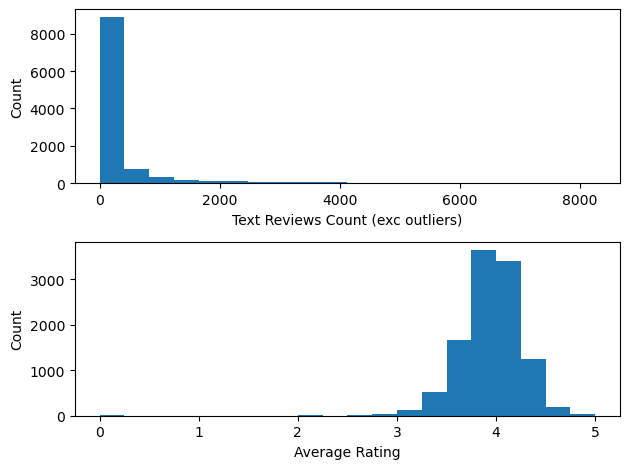

In [21]:
fig,ax = plt.subplots(2)
ax[0].hist(text_reviews_clean, bins=20)
ax[1].hist(book_data['average_rating'], bins =20)
ax[0].set_xlabel('Text Reviews Count (exc outliers)')
ax[1].set_xlabel('Average Rating')
ax[0].set_ylabel('Count')
ax[1].set_ylabel('Count')
plt.tight_layout()

We can see that reviews are normally distributed around 4, while text reviews have have a left tail.

Since we have skewed data (not normal distribution), we should apply Spearman Correlation test instead of Pearson.

Let's first find the Spearman Correlation without excluding outliers

In [22]:
text_reviews = book_data['text_reviews_count']
avg_rating = book_data['average_rating']
stats.spearmanr(text_reviews, avg_rating)

SpearmanrResult(correlation=0.034687940822982204, pvalue=0.000289303718128887)

Now, excluding the outliers, I utilized the Spearman Correlation test. I also replotted the data without the outliers.

SpearmanrResult(correlation=0.02901601203629701, pvalue=0.002573175922577308)


Text(0, 0.5, 'Average Rating')

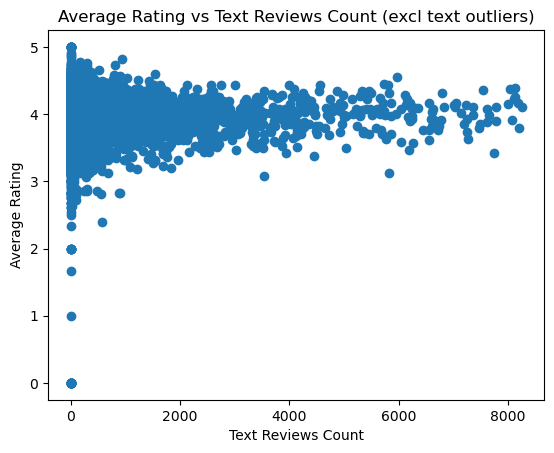

In [23]:
new_book_df = book_data[['text_reviews_count', 'average_rating']]
z = np.abs(stats.zscore(new_book_df['text_reviews_count']))
new_book_df = new_book_df[(z<3)]

#new_book_df = new_book_df[~((book_data['text_reviews_count'] < (Q1-1.5*IQR)) | (book_data['text_reviews_count'] > (Q3+1.5*IQR)))]

print(stats.spearmanr(new_book_df['text_reviews_count'], new_book_df['average_rating']))
plt.scatter(x =new_book_df['text_reviews_count'], y = new_book_df['average_rating'])
plt.title('Average Rating vs Text Reviews Count (excl text outliers)')
plt.xlabel('Text Reviews Count')
plt.ylabel('Average Rating')

We see a rather low correlation between number of written reviews and rating of the book. There also isn't too much difference in the Spearman Rank coefficient when comaring when presence of outliers vs excluding outliers. Bummer! Let's try also excluding outliers in the rating data.

SpearmanrResult(correlation=0.021873444516135803, pvalue=0.023653030151373426)


Text(0, 0.5, 'Average Rating')

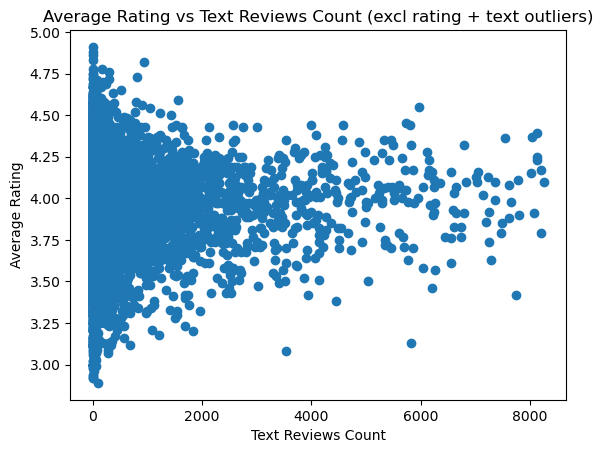

In [24]:
z2 = np.abs(stats.zscore(new_book_df['average_rating']))
new_book_df = new_book_df[(z2<3)]
print(stats.spearmanr(new_book_df['text_reviews_count'], new_book_df['average_rating']))
plt.scatter(x =new_book_df['text_reviews_count'], y = new_book_df['average_rating'])
plt.title('Average Rating vs Text Reviews Count (excl rating + text outliers)')
plt.xlabel('Text Reviews Count')
plt.ylabel('Average Rating')

Still a low correlation between the two. If using a significance level of 0.05, the Spearman rank coefficient may also not be very accurate, given that p > 0.05. Unfortunately, we will have to conclude that there is not a significant correlation between number of text reviews and rating.


## Ratings Count vs Average Rating

First, let's look at the data without excluding any outliers.

Text(0, 0.5, 'Average Rating')

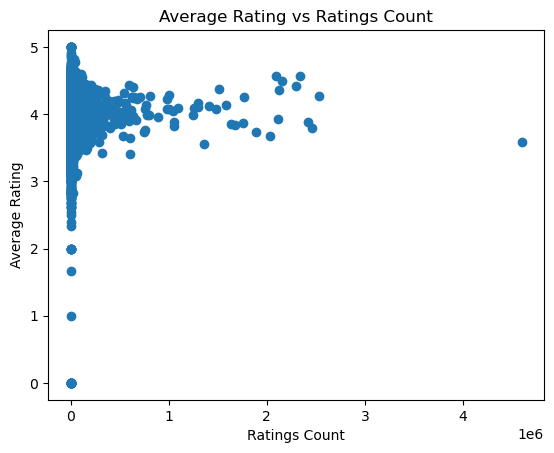

In [25]:
plt.scatter(x = book_data['ratings_count'], y =book_data['average_rating'])
plt.title('Average Rating vs Ratings Count')
plt.xlabel('Ratings Count')
plt.ylabel('Average Rating')

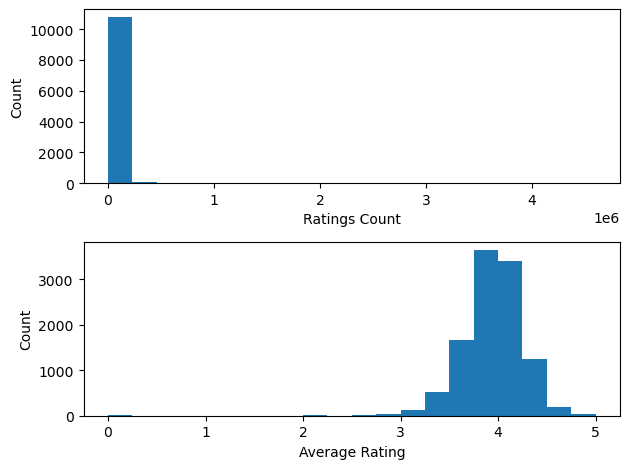

In [26]:
fig,ax = plt.subplots(2)
ax[0].hist(book_data['ratings_count'], bins=20)
ax[1].hist(book_data['average_rating'], bins =20)
ax[0].set_xlabel('Ratings Count')
ax[1].set_xlabel('Average Rating')
ax[0].set_ylabel('Count')
ax[1].set_ylabel('Count')
plt.tight_layout()

We can see from the scatter plot that we likely have a big outliers. Our ratings count histogram is also skewed left. Let's try removing outliers by z-score again.

In [27]:
new_book_df2 = book_data[['ratings_count', 'average_rating']]
z = np.abs(stats.zscore(new_book_df2['ratings_count']))
new_book_df2 = new_book_df2[(z<3)]

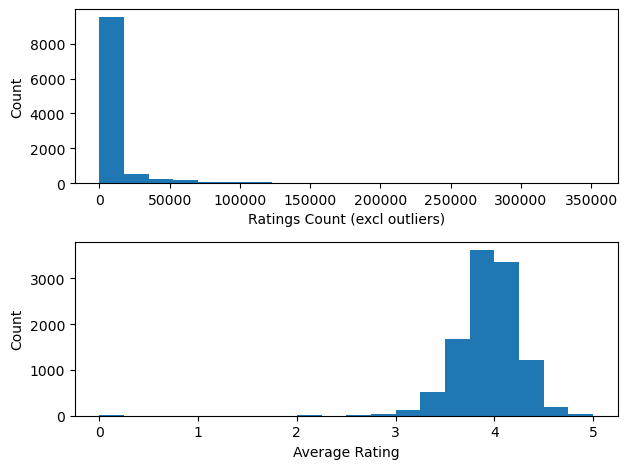

In [28]:
fig,ax = plt.subplots(2)
ax[0].hist(new_book_df2['ratings_count'], bins=20)
ax[1].hist(new_book_df2['average_rating'], bins =20)
ax[0].set_xlabel('Ratings Count (excl outliers)')
ax[1].set_xlabel('Average Rating')
ax[0].set_ylabel('Count')
ax[1].set_ylabel('Count')
plt.tight_layout()

Text(0, 0.5, 'Average Rating')

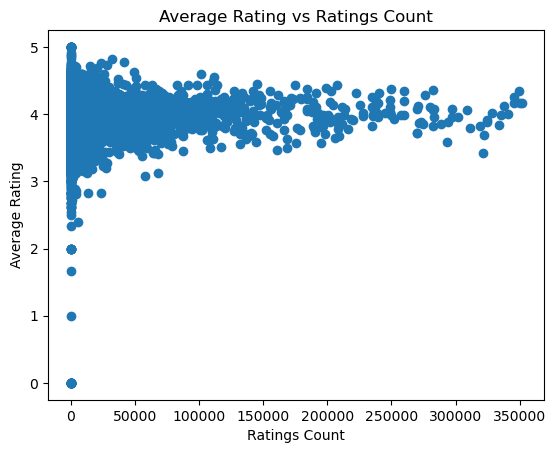

In [29]:
plt.scatter(x = new_book_df2['ratings_count'], y =new_book_df2['average_rating'])
plt.title('Average Rating vs Ratings Count')
plt.xlabel('Ratings Count')
plt.ylabel('Average Rating')

Let's perform our Spearman Rank test with and without ratings_count outliers.

In [30]:
print(stats.spearmanr(book_data['ratings_count'], book_data['average_rating']))
print(stats.spearmanr(new_book_df2['ratings_count'], new_book_df2['average_rating']))

SpearmanrResult(correlation=0.08970429638970759, pvalue=6.016790051903822e-21)
SpearmanrResult(correlation=0.08566632010027349, pvalue=4.3711477040863e-19)


Sadly, there appears to be no correlation between number of ratings and the average rating, no matter if outliers are excluded or not.